In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cd_acs = pd.read_csv("./nhgis0016_csv/nhgis0016_ds244_20195_cd116th.csv")
cd_2020 = pd.read_csv("./nhgis0016_csv/nhgis0016_ds248_2020_cd116th.csv")

In [3]:
cd_acs = cd_acs[['STATE', 'STATEA','CDCURRA','ALT0E001']]
cd_2020 = cd_2020[['STATE', 'STATEA','CDA','U7B001']]
cd_acs = cd_acs.rename(columns={'CDCURRA':"CD","ALT0E001":"ACSPOP"})
cd_2020 = cd_2020.rename(columns={'CDA':'CD','U7B001':'2020POP'})

In [35]:
cd_acs = cd_acs[cd_acs['CD'] != 'ZZ']
cd_2020 = cd_2020[cd_2020['CD'] != 'ZZ']

In [36]:
state_2020 = cd_2020.groupby('STATE').sum()['2020POP']/cd_2020.groupby('STATE').count()['CD']
state_acs = cd_acs.groupby('STATE').sum()['ACSPOP']/cd_acs.groupby('STATE').count()['CD']

In [37]:
dist_diffs = []
#for ind,row in cd_acs.iterrows():

for state in cd_2020['STATE'].unique():
    
    dist_diffs.append([state])
    
    for ind, row in cd_2020[cd_2020['STATE']==state].iterrows():
        
        dist_diffs[-1].append((row['2020POP'] - state_2020.loc[state])/state_2020.loc[state])
        
        
    
    

(array([  9.,  23.,  75., 103., 109.,  76.,  19.,  12.,   7.,   4.]),
 array([-36989. , -24303.4, -11617.8,   1067.8,  13753.4,  26439. ,
         39124.6,  51810.2,  64495.8,  77181.4,  89867. ]),
 <BarContainer object of 10 artists>)

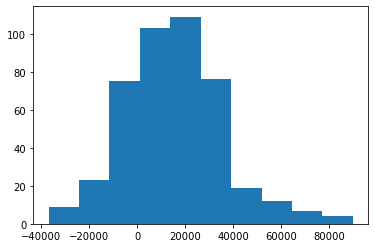

In [38]:
plt.hist(cd_2020['2020POP'] - cd_acs['ACSPOP'])

([<matplotlib.axis.XTick at 0x175654b9b20>,
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Montana'),
  Text(27, 0, 'Nebraska'),
  Text(28, 0, 'Nevada'),
  Text(29, 0, 'New Hampshire'),
  Text(30, 0, 'New Jersey'),
  Text(31, 0, 'New Mexico'),
  Text(32, 0, 'New York'),
  Text(33, 0, 'North Carolina'),
  Text(34, 0, 'North Dakota'),

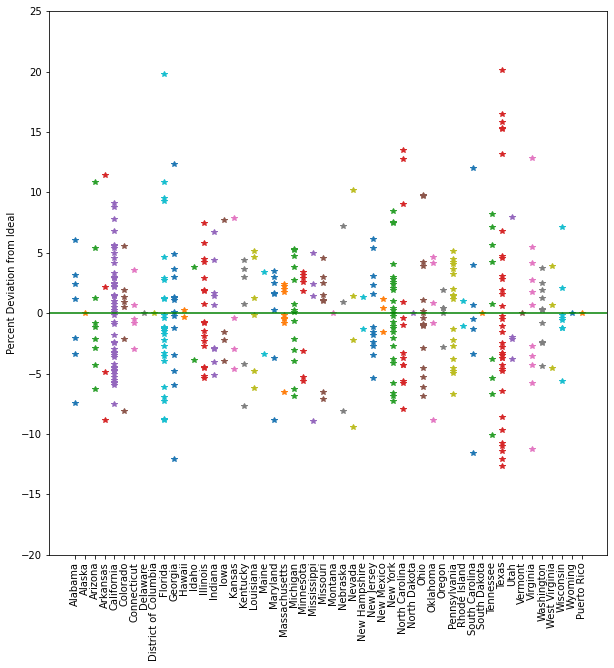

In [39]:
plt.figure(figsize=(10,10))

temp = 0 
for state in dist_diffs:
    
    if len(state) > 1:
    
        plt.plot([temp for x in range(len(state)-1)],[100*x for x in state[1:]],'*')
        temp+=1
plt.ylim([-20,25])
plt.ylabel('Percent Deviation from Ideal')
plt.axhline(y=0,color='green')

plt.xticks(range(len(dist_diffs)),[x[0] for x in dist_diffs],rotation=90)

In [40]:
dist_diffs[6]

['Connecticut',
 -0.0049013517680807665,
 -0.029517651965754385,
 -0.008082210927291226,
 0.03553466165863911,
 0.00696655300248694]

In [41]:
cd_2020[cd_2020['STATE']=='Connecticut']

,STATE,STATEA,CD,2020POP,diffs
81,Connecticut,9,01,717654,6101.0
82,Connecticut,9,02,699901,-2868.0
83,Connecticut,9,03,715360,1430.0
84,Connecticut,9,04,746816,11130.0
85,Connecticut,9,05,726213,15077.0


In [42]:
diffs_between = cd_2020['2020POP'] - cd_acs['ACSPOP']

In [43]:
cd_2020['diffs'] = diffs_between

In [44]:
between_vec = []


for state in cd_2020['STATE'].unique():
    
    between_vec.append([state])
    
    for ind, row in cd_2020[cd_2020['STATE']==state].iterrows():
        
        between_vec[-1].append((row['diffs'] )/state_2020.loc[state])


In [45]:
diffs_between

0      16141.0
1      13782.0
2      26244.0
3      18225.0
4      40740.0
        ...   
435    14235.0
436    23452.0
437    20985.0
438    -4173.0
439   -32573.0
Length: 437, dtype: float64

([<matplotlib.axis.XTick at 0x17565623370>,
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Montana'),
  Text(27, 0, 'Nebraska'),
  Text(28, 0, 'Nevada'),
  Text(29, 0, 'New Hampshire'),
  Text(30, 0, 'New Jersey'),
  Text(31, 0, 'New Mexico'),
  Text(32, 0, 'New York'),
  Text(33, 0, 'North Carolina'),
  Text(34, 0, 'North Dakota'),

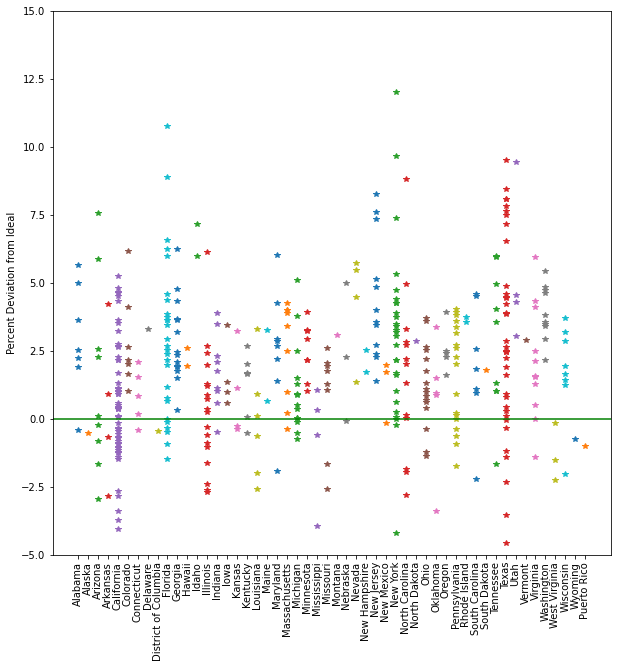

In [46]:
plt.figure(figsize=(10,10))

temp = 0 
for state in between_vec:
    
    if len(state) > 1:
    
        plt.plot([temp for x in range(len(state)-1)],[100* x for x in state[1:]],'*')
        temp+=1
plt.ylim([-5,15])
plt.ylabel('Percent Deviation from Ideal')
plt.axhline(y=0,color='green')

plt.xticks(range(len(dist_diffs)),[x[0] for x in dist_diffs],rotation=90)

In [47]:
between_vec

[['Alabama',
  0.022488201789749335,
  0.019201561059805795,
  0.03656405227496323,
  0.025391702968724467,
  0.05676038293255609,
  0.05007285622474389,
  -0.00423961328580678],
 ['Alaska', -0.00501369665021796],
 ['Arizona',
  -0.00217087263626578,
  0.02566663618355976,
  0.0012270149683241366,
  0.022739418936050075,
  0.07564704589329625,
  -0.008192684557733466,
  -0.029624546004461717,
  0.05884134549637265,
  -0.016771721520877712],
 ['Arkansas',
  -0.006674361552489703,
  0.00898946845517419,
  0.04216868270018768,
  -0.028340468148352792],
 ['California',
  -0.006540177589670634,
  0.0038190133127631964,
  0.026656686113586847,
  0.03544081887544617,
  0.0010670181105508967,
  0.036349660934432995,
  0.04658820908567388,
  0.04348769038001531,
  0.04802519829988313,
  0.021845721291015027,
  0.009124613415226072,
  0.011237202036115787,
  0.027544080572361587,
  -0.009099144389974228,
  0.022789415700346472,
  0.026517276712208337,
  0.004277455767296371,
  0.0102586552764397

In [48]:
max([100*x for x in state[1:] for state in dist_diffs])

-0.9913039879191959

In [66]:
maxes = []
mins = []
maxes3 = []
mins3 = []

for i in range(len(dist_diffs)):
    maxes.append(max(dist_diffs[i][1:]))
    #if -1 in dist_diffs[i][1:]:
    #    temp = dist_diffs[i][1:].copy()
    #    temp.remove(-1)
    #else:
    #    mins.append(min(dist_diffs[i][1:]))
    mins.append(min(dist_diffs[i][1:]))
    
    if len(dist_diffs[i]) >5:
        maxes3.append(max(dist_diffs[i][1:]))
        mins3.append(min(dist_diffs[i][1:]))


In [60]:
max(maxes)

0.20097846992186272

In [61]:
mins



[-0.07404087233212962,
 0.0,
 -0.06309164144818813,
 -0.08803914562859204,
 -0.07478940062632551,
 -0.0806958917604855,
 -0.029517651965754385,
 0.0,
 0.0,
 -0.088059036723936,
 -0.12038154173840922,
 -0.0030173074293379032,
 -0.03842954130974506,
 -0.053435908098554946,
 -0.05116875208532034,
 -0.039782545529999824,
 -0.0458793415660272,
 -0.07668943121764747,
 -0.06176384899426918,
 -0.03381120541648714,
 -0.08858477529712376,
 -0.064824947435368,
 -0.0682213375744034,
 -0.05579292644485388,
 -0.08891934870034197,
 -0.07099125527850678,
 0.0,
 -0.08129221250632163,
 -0.09448066651764116,
 -0.013026948978932567,
 -0.05374855447209896,
 -0.01595780350806267,
 -0.07308983716798897,
 -0.0791961176268187,
 0.0,
 -0.0682709903039532,
 -0.08813636975536152,
 -0.028135189377276184,
 -0.06651310881586135,
 -0.010238030798839781,
 -0.11589190034043681,
 0.0,
 -0.1004362711334657,
 -0.12614586708996808,
 -0.03813405974295272,
 0.0,
 -0.11204309663573427,
 -0.04377530164052418,
 -0.0456833746256

In [62]:
mins[39]

-0.010238030798839781

In [58]:
dist_diffs[39]

['Rhode Island', 0.010238030798839781, -0.010238030798839781]

In [67]:
min(maxes3)

0.019589092563678058

In [68]:
max(mins3)

-0.028135189377276184